In [1]:
import tensorwatch as tw
from dlc_lib import DlcDataset
ds = DlcDataset(linearize=True, data_root='D:\\datasets\\dlc\\current')
ds = tw.pyt_ds2list(ds)

Using data in D:\datasets\dlc\current


In [2]:
import tensorwatch as tw

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def show_image(img, size=None):
    if size is not None or (hasattr(img, 'shape') and len(img.shape) == 1):
        if size is None:
            # make guess for 1-dim tensors
            h = int(math.sqrt(img.shape[0]))
            w = int(img.shape[0] / h)
            size = h,w
        img = np.reshape(img, size)
    #fig = plt.Figure()
    #ax = fig.add_subplot(111)
    #ax.imshow(img)
    return plt.imshow(img) #TODO support console

In [4]:
cap_imgs = tw.col2array(ds, 0)

In [35]:
results = tw.search_similar([ds[3][0]], cap_imgs, topk=1000)

In [36]:
results[0][995]

(0.095658657809822814,
 (3610,
  array([ 1.,  1.,  1., ...,  1.,  1.,  1.], dtype=float32),
  array([ 1.        ,  1.        ,  0.96654737, ...,  1.        ,
          1.        ,  1.        ], dtype=float32)))

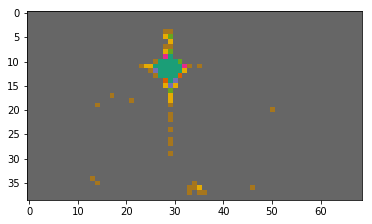

In [41]:
tw.show_image(results[0][5][1][1], (39, 69))

In [42]:
results[0][5][0]

0.095027700802719092

In [27]:
avg_i = np.mean([data for score, (i, input, data) in results[0]], axis=0)

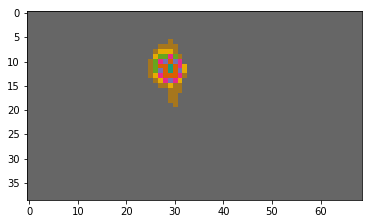

In [31]:
tw.show_image(avg_i, (39, 69))

In [32]:
avg_o = np.mean([ds[i][1] for score, (i, input, data) in results[0]], axis=0)

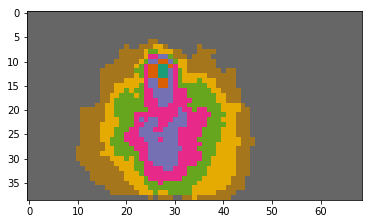

In [33]:
tw.show_image(avg_o, (39, 69))

In [17]:
img_plot_data = [(data, str(i) + '-' + str(score), ds[i][1]) for score, (i, input, data) in results[0]]

In [43]:
img_plot = tw.open(img_plot_data, type='image', rows=2, cols=2, img_width=69, img_height=39, viz_img_scale=3, height='10in')
img_plot.show()